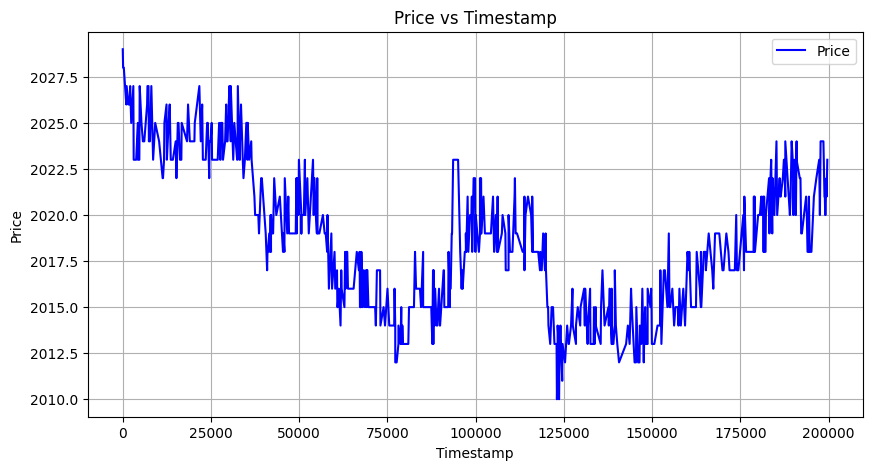

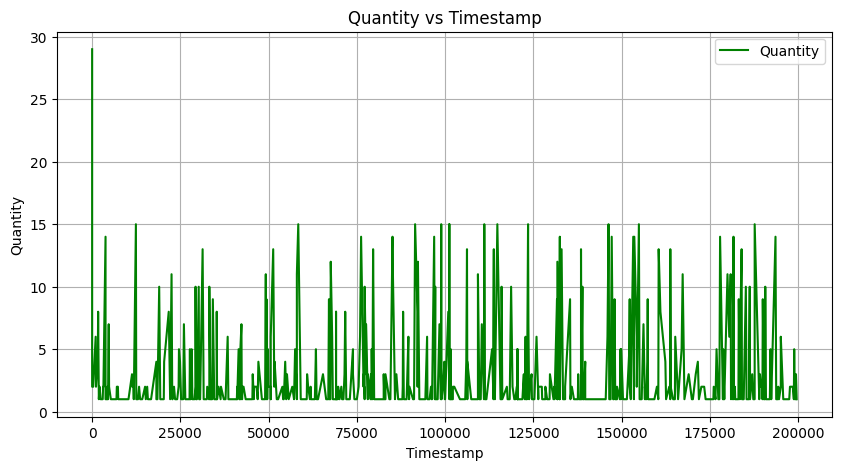

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('initial_output.csv')

# Plot price vs timestamp
plt.figure(figsize=(10, 5))
plt.plot(data['timestamp'], data['price'], label='Price', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Price vs Timestamp')
plt.legend()
plt.grid()
plt.show()

# Plot quantity vs timestamp
plt.figure(figsize=(10, 5))
plt.plot(data['timestamp'], data['quantity'], label='Quantity', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Quantity')
plt.title('Quantity vs Timestamp')
plt.legend()
plt.grid()
plt.show()

In [3]:
unique_timestamps = data['timestamp'].nunique()
print(f"Number of unique timestamps: {unique_timestamps}")

Number of unique timestamps: 536


Mean Squared Error: 2.6717728004263637
Model Coefficients: [0.1251954  0.10278807 0.12282752 0.29186807 0.31594948]
Sum of Coefficients: 0.9586285401478885
Model Intercept: 83.44027023531362


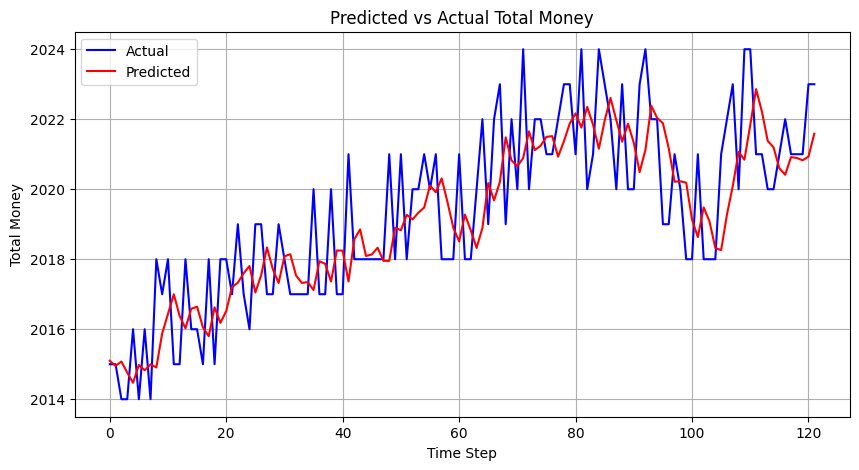

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Calculate the total money for each trade
data['total_money'] = data['price'] 

# Define the moving window size (n)
n = 5

# Prepare the data for the autoregressive model
X, y = [], []
for i in range(n, len(data)):
    X.append(data['total_money'].iloc[i-n:i].values)  # Past n values
    y.append(data['total_money'].iloc[i])            # Current value

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train the autoregressive model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display the coefficients of the model
print("Model Coefficients:", model.coef_)
sum = 0
for i in range(len(model.coef_)):
    sum += model.coef_[i]
print("Sum of Coefficients:", sum)
print("Model Intercept:", model.intercept_)
# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.xlabel('Time Step')
plt.ylabel('Total Money')
plt.title('Predicted vs Actual Total Money')
plt.legend()
plt.grid()

Manually Calculated Predictions: [2015.09918596 2014.95158323 2015.07677863 2014.76082916 2014.46896108
 2014.97803251 2014.82708163 2014.9957041  2014.90746237 2015.87799385
 2016.43904695 2016.99925311 2016.3812067  2016.02642354 2016.58338207
 2016.64391852 2016.05307876 2015.79983843 2016.62582885 2016.18036631
 2016.51830504 2017.20859548 2017.32835057 2017.60115946 2017.80575532
 2017.04893668 2017.53964273 2018.33723408 2017.72063884 2017.3200715
 2018.0819016  2018.14411213 2017.53155883 2017.32243937 2017.34721458
 2017.11923111 2017.94188415 2017.86963993 2017.36251829 2018.25024835
 2018.24522612 2017.36251829 2018.56619783 2018.85304367 2018.09316336
 2018.13583306 2018.32825045 2017.95266425 2017.95266425 2018.90051269
 2018.82826847 2019.26899526 2019.13663267 2019.32863198 2019.47666356
 2020.10549007 2019.91139861 2020.30869834 2019.63267852 2018.90230916
 2018.51141926 2019.27609888 2018.82826847 2018.32114683 2018.89292741
 2020.1757845  2019.68174107 2020.20521647 20

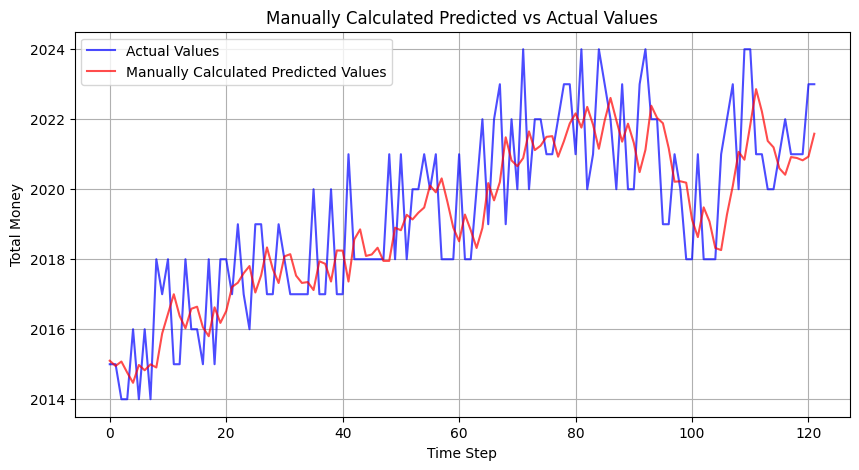

In [19]:
# Manually calculate predictions
y_pred_manual = model.intercept_ + np.dot(X_test, model.coef_)
print("Manually Calculated Predictions:", y_pred_manual)
yy = []
intercept = 83.44
coeffs = [0.1251954 , 0.10278807, 0.12282752, 0.29186807 ,0.31594948]
for j in range(len(X)-5):
    my_pred = intercept
    for i in range(5):
        my_pred += coeffs[i] * X[i+j]
    yy.append(my_pred)
yy = np.array(yy)


# Plot the predicted vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Values', color='blue', alpha=0.7)
plt.plot(y_pred_manual, label='Manually Calculated Predicted Values', color='red', alpha=0.7)
plt.xlabel('Time Step')
plt.ylabel('Total Money')
plt.title('Manually Calculated Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()



/home/threesamyak/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/threesamyak/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/threesamyak/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/threesamyak/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueW

ARIMA Model MSE: 25.634219548673716


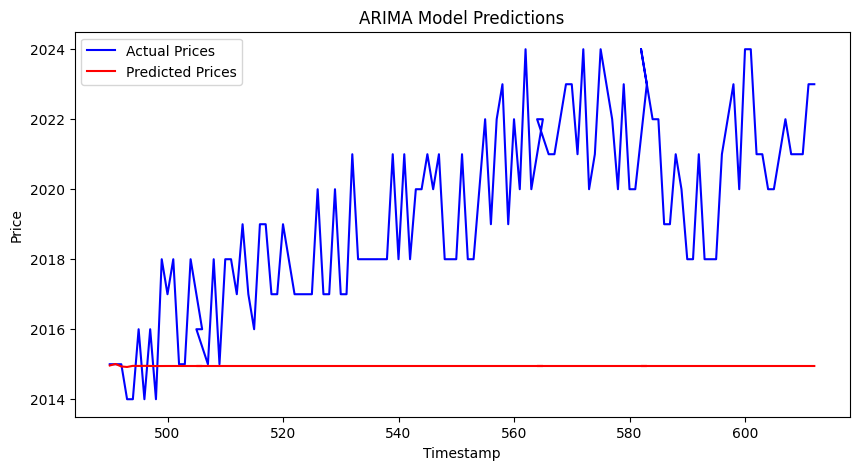

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Sort the data by timestamp
data = data.sort_values(by='timestamp')

# Extract the price column as a time series
price_series = data['price']

# Split the data into training and testing sets
train_size = int(len(price_series) * 0.8)
train, test = price_series[:train_size], price_series[train_size:]

# Fit the ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) parameters
arima_result = arima_model.fit()

# Make predictions
predictions = arima_result.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, predictions)
print(f"ARIMA Model MSE: {mse}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, predictions, label='Predicted Prices', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()

In [6]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 14.2 MB/s eta 0:00:00MB/s eta 0:00:01:01
